## case 3:
TF = 25 pM, original initial conditions  
## Given:  
model data of 33 species (except species 16)  
experiment data of 1 species (species 16)  
ODE with 3 unknowns h_10_TPplus, h_10_TPminus, h_2  
## Target to:
fit experiment data  
infer 3 unknowns  
(expect that species 16 solved by ode solver with infered unknowns fit the experiment data)

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf

import models

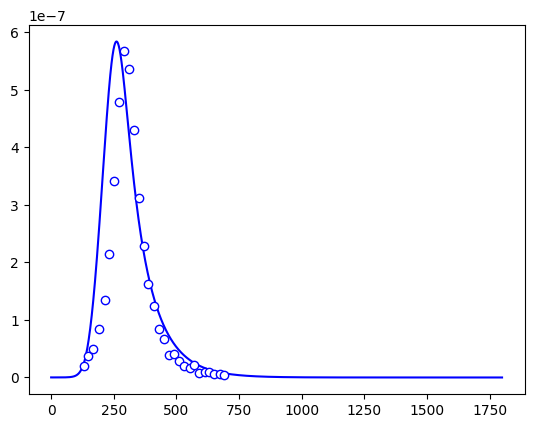

In [2]:
data = sio.loadmat("./data/data_case_3.mat")
t_test = data["t"]
u_test = data["Y"] # scaling?

#name_list = ['TF','VII', 'TF:VII', 'VIIa', 'TF:VIIa', 'IX', 'IXa', 'IXm', 'IXam',
#'X', 'Xa', 'Xm', 'Xam', 'II', 'IIa', 'IIm', 'IIam', 'PL', 'AP', 'VIII', 'VIIIa', 'VIIIm',
#'VIIIam', 'VIIIam:IXam', 'V', 'Va', 'Vm', 'Vam', 'Xam:Vam', 'I', 'Ia', 'TFPI', 'Xa:TFPI', 'ATIII']

TIM = 1800
NDM = [0.025, 10.0, 0.005, 10.0, 0.005, 90.0, 90.0, 10.0, 10.0, 170.0,
       170.0, 10.0, 10.0, 1400.0, 1400.0, 10.0, 10.0, 10.0, 10.0,
       0.7, 0.7, 0.7, 0.7, 0.7, 20.0, 20.0, 10.0, 10.0, 10.0, 7000.0,
       7000.0, 2.5, 2.5, 3400.0] #nM

exp_data = np.loadtxt("./data/exp_data_case_3.dat").T
t_exp = exp_data[0].reshape([-1, 1])
u_exp = exp_data[1].reshape([-1, 1])

plt.plot(t_test * TIM, (u_test[:, 14] * NDM[14] + u_test[:, 16] * NDM[16]) * 1e-9, 'b', label='Model(No Inh)')
plt.plot(t_exp, u_exp, 'bo', markerfacecolor='w', label='Exp')
plt.show()

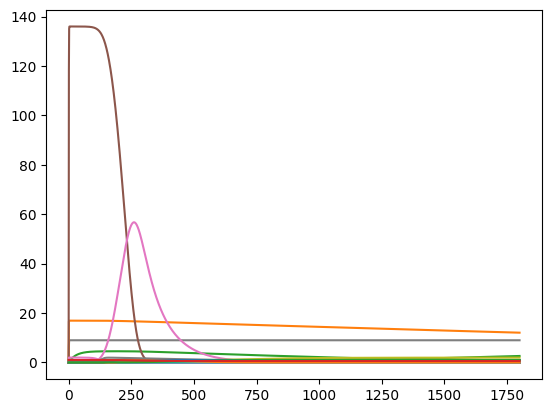

In [3]:
plt.plot(t_test * TIM, u_test)
plt.show()

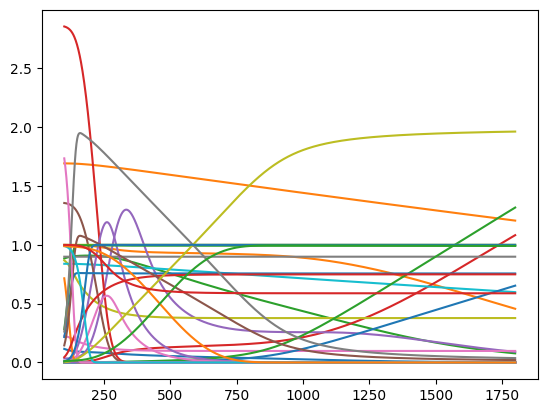

In [4]:
scale = np.array(
    [1, 1, 5, 0.5, 0.1, 1, 0.0000002, 10, 0.001, 0.005, \
     0.001, 10, 2, 0.01, 0.01, 100, 100, 1, 1, 1, \
    0.0001, 1, 1, 0.01, 1, 0.0001, 1, 1, 1, 1, \
    1, 1, 1, 1]
).reshape([-1])

u_test = u_test / scale

plt.plot(t_test[100:] * TIM, u_test[100:, :])
plt.show()

In [5]:
# u_test[:, 16] * NDM[16] * scale[16] * 1e-9 = u_exp * scale_exp
# u_test[:, 16] * 10.0 * 100 * 1e-9 = u_exp * scale_exp
# u_test[:, 16] * 1e-6 = u_exp * scale_exp
scale_exp = 1e-6
u_exp = u_exp / scale_exp

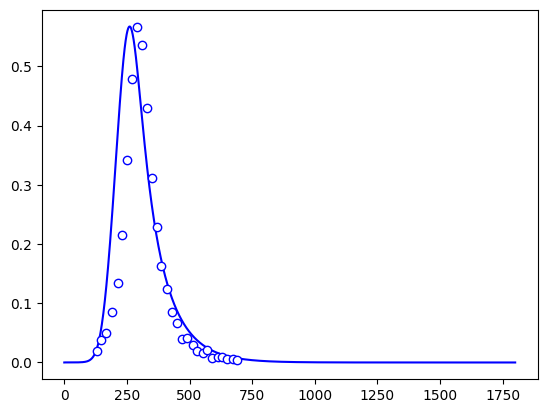

In [6]:
plt.plot(t_test * TIM, u_test[:, 16], 'b', label='Model(No Inh)')
plt.plot(t_exp, u_exp, 'bo', markerfacecolor='w', label='Exp')
plt.show()

In [7]:
t_train_model = t_test[200:][::20] # discard first 200 fluctuant points
u_train_model = u_test[200:][::20]
t_train_exp = t_exp / TIM
u_train_exp = u_exp
f_train = np.zeros_like(u_train_model)

model = models.PINN(TIM, NDM, scale, eps=1e-6)

In [13]:
# loss = model.train(t_train, f_train, t_train, u_train, eps=1e-7, niter=400000)
loss = model.train(t_train_model, f_train, t_train_model, u_train_model, t_train_exp, u_train_exp, eps=1e-9, niter=200000)
# print total loss, data loss, ode loss, eq10_loss, eq14_loss, eq31_loss, eq32_loss, eq33_loss

0 7.002621e-05 5.2645613e-05 17380.6 155098.61 1736653700.0 1.5659733 1.5850412 0.0009360775
1000 0.00028262442 0.00026520895 17415.469 1898547.1 1738223600.0 1.1178545 1.1229346 0.0012006512
2000 0.00017393172 0.000156541 17390.72 4086345.5 1733826400.0 1.1777788 1.2128105 0.0009203979
3000 8.389543e-05 6.650509e-05 17390.338 379877.78 1737303300.0 1.8182927 1.8270062 0.0009861739
4000 0.00012704919 0.00010973665 17312.543 163067.17 1730025900.0 0.95805925 0.9775059 0.00087179494
5000 6.4221094e-05 4.689236e-05 17328.73 97730.09 1731725300.0 1.2114698 1.2257755 0.000806357
6000 0.000116833515 9.913533e-05 17698.184 399171.56 1768345700.0 1.2705728 1.2955205 0.00081688433
7000 0.00011570892 9.858021e-05 17128.709 411140.94 1711255000.0 1.9306527 1.9537711 0.0008162157
8000 0.00027733785 0.0002593427 17995.162 4781375.0 1792943600.0 3.8207896 3.8058028 0.0010287997
9000 7.312857e-05 5.5801742e-05 17326.828 552162.5 1731113000.0 1.0488771 1.0541142 0.0008074741
10000 0.00021090449 0.0001

490000 3.681334e-05 1.9576359e-05 17236.98 9488.008 1723597400.0 0.07681203 0.07512025 7.591131e-05
491000 4.0709023e-05 2.342171e-05 17287.314 14212.311 1728623500.0 0.07626874 0.07464822 7.87995e-05
492000 3.7337795e-05 2.0057334e-05 17280.46 18936.668 1727927700.0 0.12164648 0.11970297 7.5419695e-05
493000 3.6475045e-05 1.9282345e-05 17192.703 15142.816 1719162200.0 0.052977864 0.051456816 8.253584e-05
494000 3.4308305e-05 1.7080632e-05 17227.672 16155.455 1722668400.0 0.05634581 0.055462606 7.144286e-05
495000 3.4524644e-05 1.7291088e-05 17233.557 11188.371 1723259400.0 0.05514795 0.054037064 7.422241e-05
496000 4.687869e-05 2.9805517e-05 17073.176 51849.875 1707164400.0 0.055962134 0.05466961 9.0170055e-05
497000 4.1740455e-05 2.4532546e-05 17207.91 27823.436 1720649500.0 0.046232637 0.04477492 0.000104732295
498000 8.308348e-05 6.557179e-05 17511.695 234190.2 1750827800.0 0.16676964 0.164853 7.447066e-05
499000 4.1830775e-05 2.4659048e-05 17171.73 48861.43 1717007200.0 0.06281557

In [14]:
model.restore()
u_pred = model.call(tf.constant(t_test, tf.float32)).numpy()

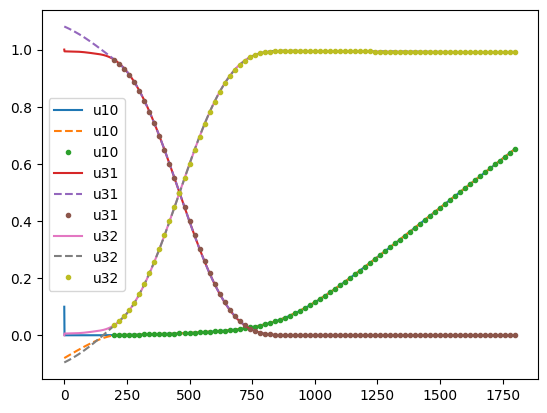

In [15]:
plt.plot(t_test * TIM, u_test[:, 10], label='u10')
plt.plot(t_test * TIM, u_pred[:, 10], '--', label='u10')
plt.plot(t_train_model * TIM, u_train_model[:, 10], '.', label='u10')
# plt.plot(t_test * TIM, u_test[:, 18], label='u18')
# plt.plot(t_test * TIM, u_pred[:, 18], '--', label='u18')
# plt.plot(t_train * TIM, u_train[:, 18], '.', label='u18')
plt.plot(t_test * TIM, u_test[:, 31], label='u31')
plt.plot(t_test * TIM, u_pred[:, 31], '--', label='u31')
plt.plot(t_train_model * TIM, u_train_model[:, 31], '.', label='u31')
plt.plot(t_test * TIM, u_test[:, 32], label='u32')
plt.plot(t_test * TIM, u_pred[:, 32], '--', label='u32')
plt.plot(t_train_model * TIM, u_train_model[:, 32], '.', label='u32')
plt.legend()
plt.show()

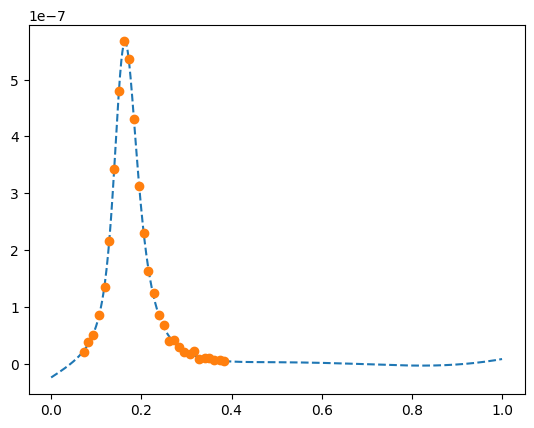

In [16]:
j = 16
plt.plot(t_test, u_pred[:, j] * NDM[j] * scale[j] * 1e-9, '--')
# plt.plot(t_train_model, u_train_model[:, j] * NDM[j] * scale[j] * 1e-9, ".")
plt.plot(t_train_exp, u_train_exp * scale_exp, "o")
plt.show()

In [17]:
# References:
# h_10_TPplus = 4.381
# h_10_TPminus = 5.293 * 1e-8
# h_2 = 1.79 * 1e-4
print("h_10_TPplus:", tf.math.exp(model.log_h_10_TPplus).numpy())
print("h_10_TPminus:",  tf.math.exp(model.log_h_10_TPminus).numpy())
print("h_2:", tf.math.exp(model.log_h_2).numpy())

h_10_TPplus: 4.0412946
h_10_TPminus: 0.00013334406
h_2: 0.000177936
